# Heart Stroke Prediction

In [463]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [464]:
#load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1. Data Analysis

In [465]:
df.shape

(5110, 12)

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [467]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [468]:
# check for missing values or NaN
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [469]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# 2. Data Preprocessing

##### Dropping the unecessary columns

In [470]:
df.drop('id', axis=1, inplace=True)

In [471]:
#change "age" float63 type to int
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [472]:
#replacing bmi missing values with the most frequent value?
#df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

#replacing bmi missing values with the mean value?
bmi_median = df['bmi'].median(skipna=True)
df['bmi'].fillna(bmi_median, inplace=True)

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Check values and their count in the columns

In [473]:
print(df['hypertension'].value_counts())
print(df['heart_disease'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


# 3. Data Exploration

<Axes: xlabel='Residence_type', ylabel='count'>

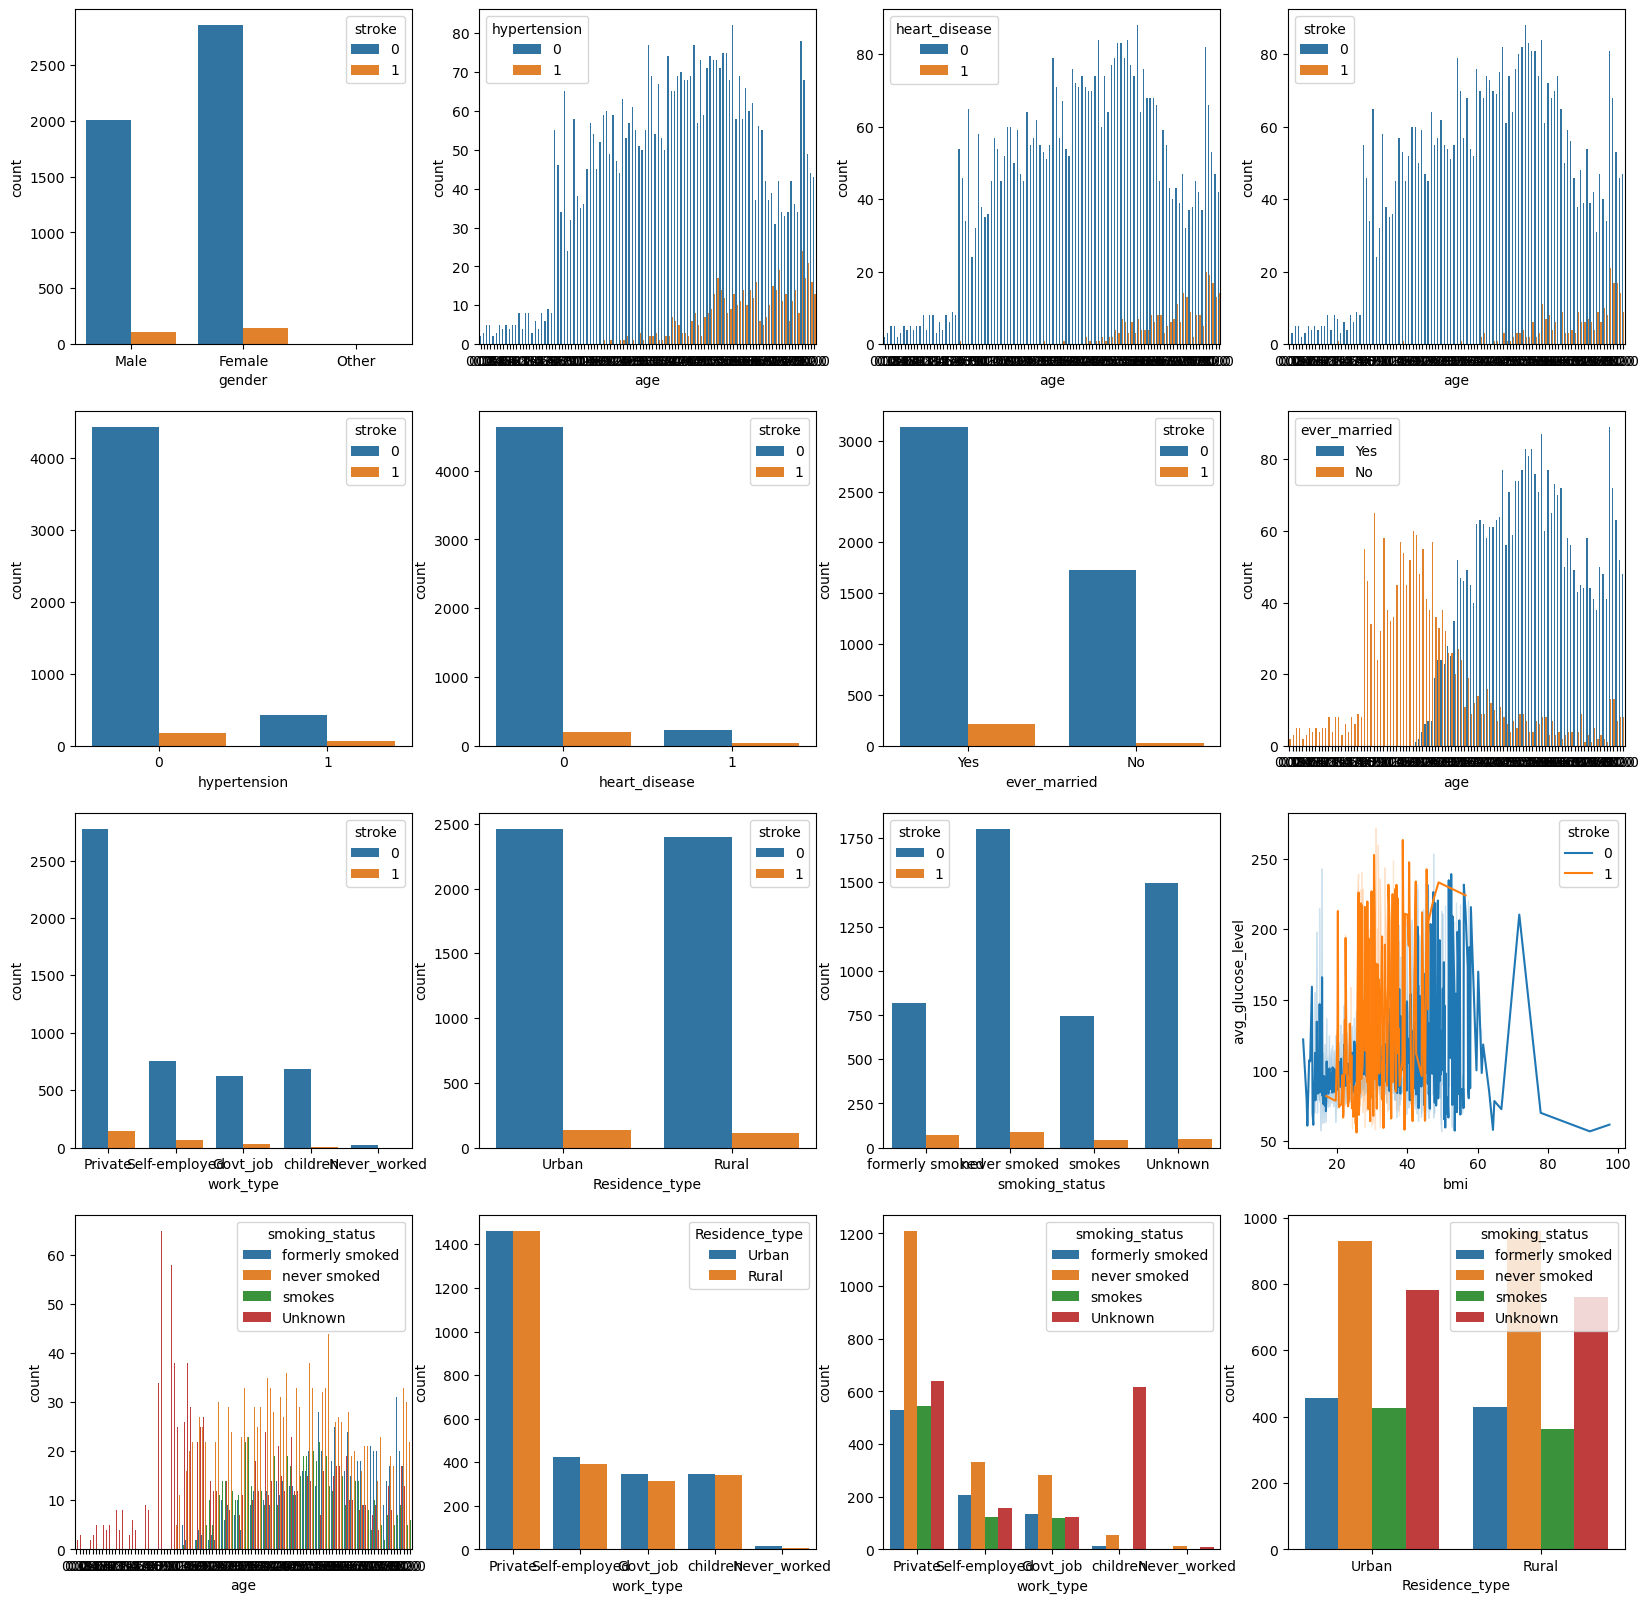

In [474]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

The data is quite interesting:
1. Person with no hypertension tend to get stroke higher than person with hypertension
2. Person with no heart disease tend to get stroke higher than person with heart disease

# 4. Data Preprocessing-2

#### Replacing the categorical values in columns with numerical values (label Encoding)

In [475]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [476]:
#label encoding for geography and gender
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [477]:
vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

gender : [1 0 2]
ever_married : [1 0]
work_type : [2 3 0 4 1]
Residence_type : [1 0]
smoking_status : [1 2 3 0]


In [478]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [479]:
#binning for age columns
from sklearn.preprocessing import KBinsDiscretizer

# 1. manual Binning
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 
# df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
# df.head()

# 2. Binning using sklearn
n_bins = 5  # Number of bins
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
df['age'] = bin_encoder.fit_transform(df[['age']])

df.head()


/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4.0,0,1,1,2,1,228.69,36.6,1,1
1,0,3.0,0,0,1,3,0,202.21,28.1,2,1
2,1,4.0,0,1,1,2,0,105.92,32.5,2,1
3,0,2.0,0,0,1,2,1,171.23,34.4,3,1
4,0,4.0,1,0,1,3,0,174.12,24.0,2,1


# 5. Data Exploratory

Find correlation between variables

<Axes: >

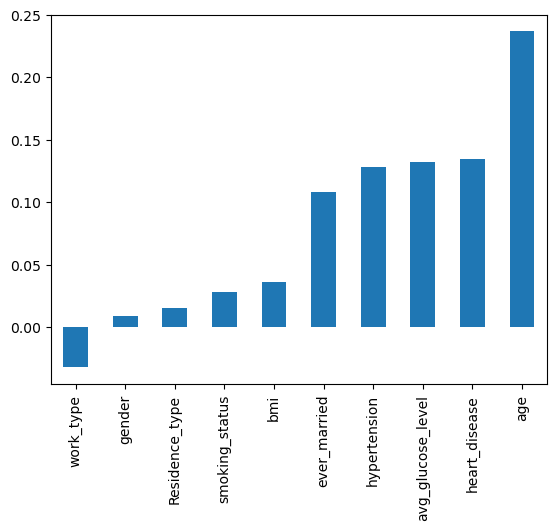

In [480]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

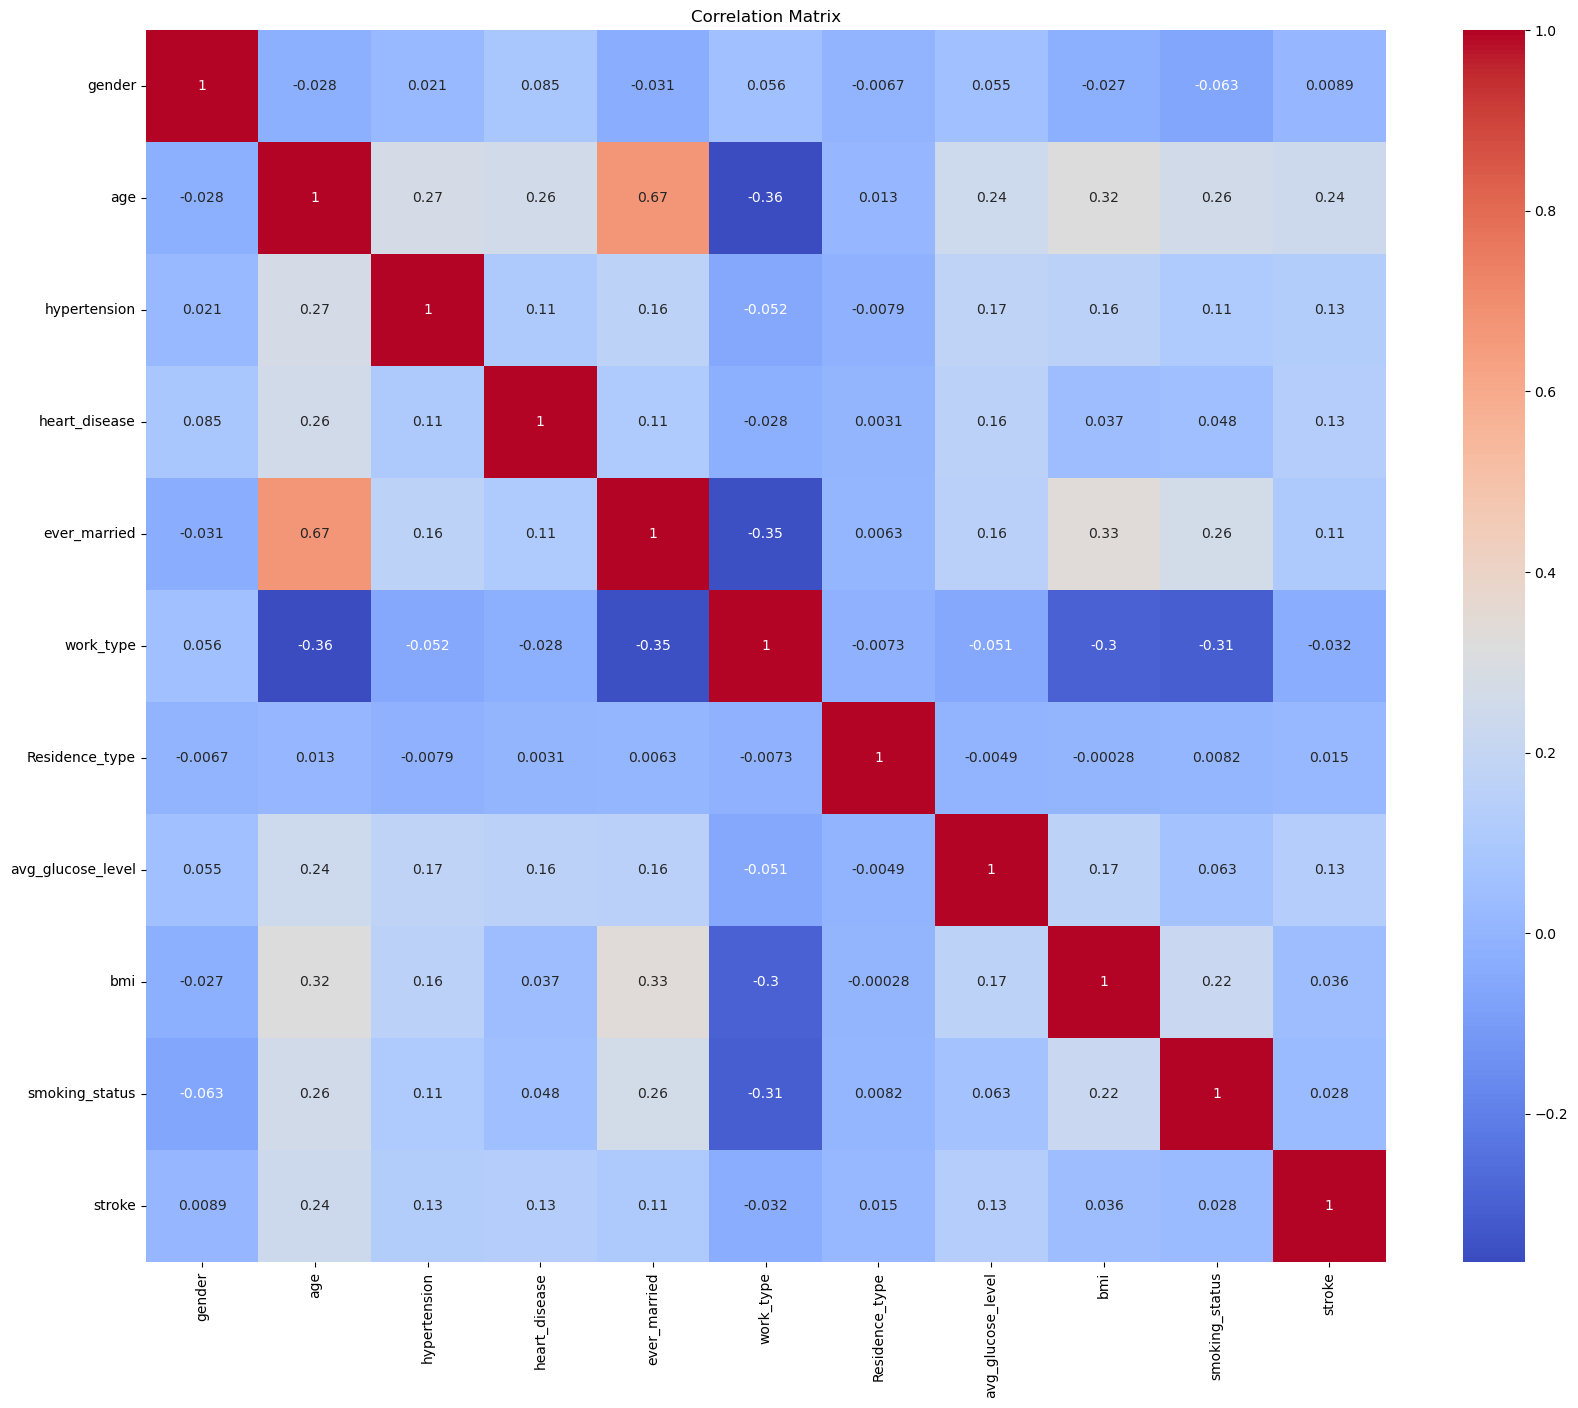

In [481]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

Age has high correlationa to stroke. Next are heart_disease, glucose level, hypertenstion, and marital status.

## Train/Test Split

In [482]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke',axis=1), df['stroke'], test_size=0.3, random_state=42)

## Model Building

### 1. Logistic Regression

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr

LogisticRegression()

In [484]:
#training the model
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9419439008480104

### 2. Support Vector Machine (SVM)

In [485]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [486]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9419439008480104

Remarks: Here we can see that SVM and Linear Regression produce the same accuracy score

### 3. Decision Tree Classifier

Using GridSearchCV to find the best parameters for the model.

In [487]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

Use below for better result for DecisionTreeClassifier by searching for the best parameter

In [488]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# #creating Decision Tree Classifer object
# dtree = DecisionTreeClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10,12,14,16,18,20],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

# #Fitting the grid search object to the training data
# grid_dtree.fit(X_train, y_train)

# #Printing the best parameters
# print('Best parameters found: ', grid_dtree.best_params_)

Add the best parameters to the model

In [489]:
# dtree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0, min_samples_leaf=1)
# dtree

In [490]:
#training the model
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.908675799086758

### 4. K-Nearest Neighbors (KNN)

In [491]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [492]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9406392694063926

## Model Evaluation

### 1. Logistic Regression

In [493]:
#testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9419439008480104

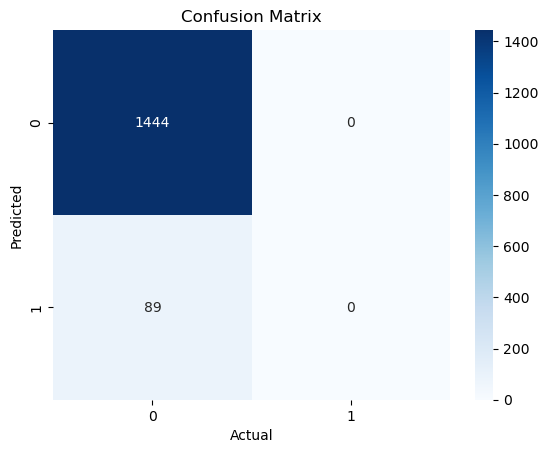

In [494]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_17618/1016010464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_17618/1016010464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

Text(0.5, 1.0, 'Actual vs Fitted Values for Heart Stroke Prediction')

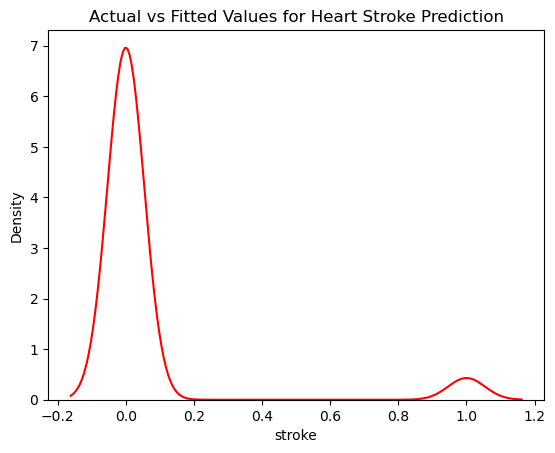

In [495]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lr_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Heart Stroke Prediction')

#### Classification Report

In [496]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [497]:
from sklearn.metrics import accuracy_score, mean_absolute_error, log_loss, f1_score, mean_squared_error
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss: ',log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9419439008480104
Logistic Regression Model F1 score:  0.0
Logistic Regression Model Mean Absolute Error:  0.05805609915198956
Logistic Regression Model Mean Squared Error:  0.05805609915198956
Logistic Regression Model log loss:  2.09255391495853


### 2. Support Vector Machine (SVM)

In [498]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9419439008480104

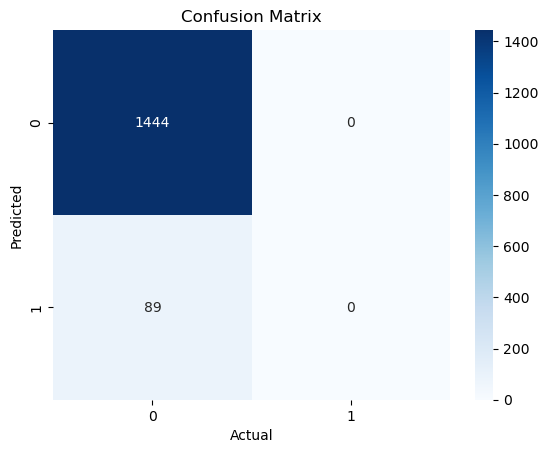

In [499]:
sns.heatmap(confusion_matrix(y_test, sv_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Classification Report

In [500]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [501]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, sv_pred))
print('SVM Model F1 score: ',f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error: ',mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error: ',mean_squared_error(y_test, sv_pred))
print('SVM Model log loss: ',log_loss(y_test, sv_pred))

SVM Model Accuracy Score: 0.9419439008480104
SVM Model F1 score:  0.0
SVM Model Mean Absolute Error:  0.05805609915198956
SVM Model Mean Squared Error:  0.05805609915198956
SVM Model log loss:  2.09255391495853


### 3. Decision Tree Classifier

In [502]:
#testing the model
dtree_pred = dtree.predict(X_test)
accuracy_score(y_test, dtree_pred)

0.908675799086758

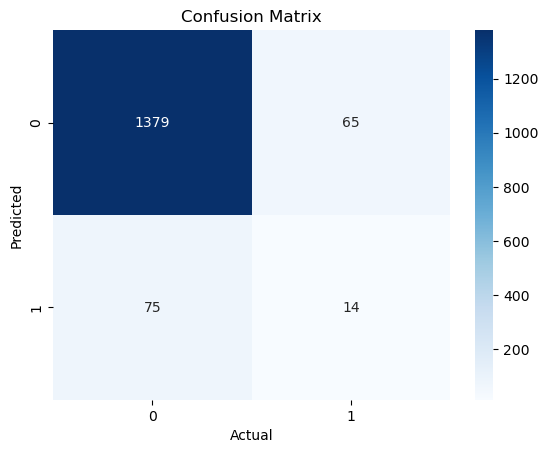

In [503]:
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_17618/460734539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_17618/460734539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

Text(0.5, 1.0, 'Actual vs Fitted Values for Heart Stroke Prediction')

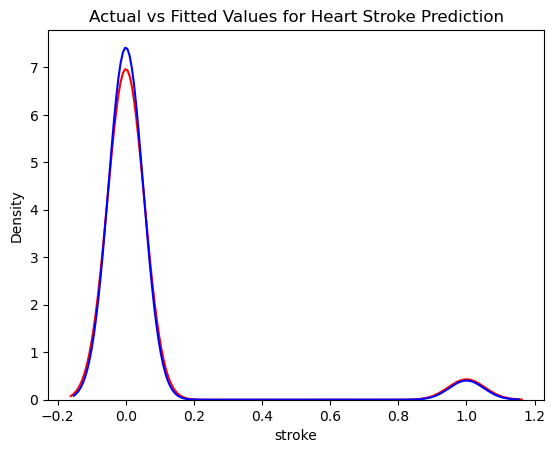

In [504]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Heart Stroke Prediction')

In [505]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dtree_pred))
print('Decision Tree Model F1 score: ',f1_score(y_test, dtree_pred))
print('Decision Tree Model Mean Absolute Error: ',mean_absolute_error(y_test, dtree_pred))
print('Decision Tree Model Mean Squared Error: ',mean_squared_error(y_test, dtree_pred))
print('Decision Tree Model log loss: ',log_loss(y_test, dtree_pred))

Decision Tree Model Accuracy Score: 0.908675799086758
Decision Tree Model F1 score:  0.16666666666666669
Decision Tree Model Mean Absolute Error:  0.091324200913242
Decision Tree Model Mean Squared Error:  0.091324200913242
Decision Tree Model log loss:  3.2916578437549915


### 4. K-Nearest Neighbors (KNN)

In [506]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9406392694063926

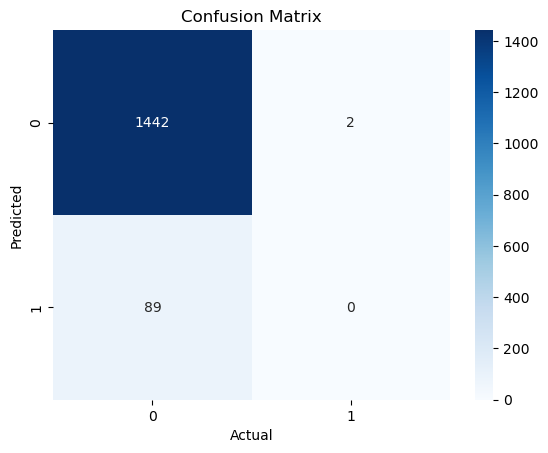

In [507]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_17618/2082310860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_17618/2082310860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

Text(0.5, 1.0, 'Actual vs Fitted Values for Heart Stroke Prediction')

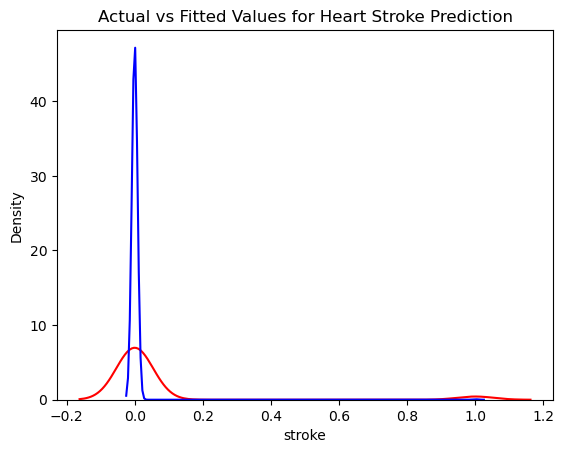

In [508]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(knn_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Heart Stroke Prediction')

In [509]:
print('KNN Model Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN Tree Model F1 score: ',f1_score(y_test, knn_pred))
print('KNN Tree Model Mean Absolute Error: ',mean_absolute_error(y_test, knn_pred))
print('KNN Tree Model Mean Squared Error: ',mean_squared_error(y_test, knn_pred))
print('KNN Tree Model log loss: ',log_loss(y_test, knn_pred))

KNN Model Accuracy Score: 0.9406392694063926
KNN Tree Model F1 score:  0.0
KNN Tree Model Mean Absolute Error:  0.0593607305936073
KNN Tree Model Mean Squared Error:  0.0593607305936073
KNN Tree Model log loss:  2.1395775984407446


# Model Comparison

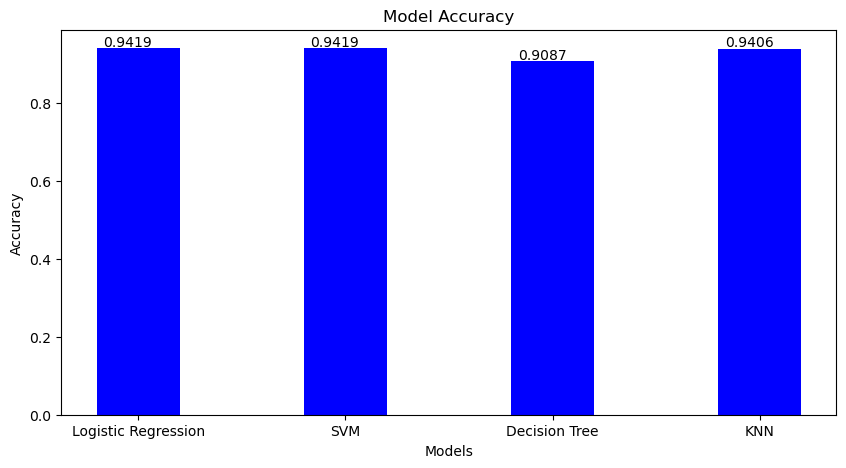

In [515]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, dtree_pred), accuracy_score(y_test, knn_pred)]

plt.figure(figsize=(10,5))
bars = plt.bar(models, accuracy, color='blue', width=0.4)

# Adding accuracy values on top of each bar
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.005, f'{acc:.4f}', ha='center')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

## Conclusion

The model accuracies of Logistic Regression, SVM and KNN  are quite similar at ~94%. The accuracy of Decision Tree Classifier is 90.8%. So, we can use any of these models to predict the heart stroke.

According to the graphs age v/s hypertension, heart disease showing chances of stroke, the number of person having a stroke shows dependece upon heart disease and hypertension. But when we plot the graph of heart disease and hypertension against the stroke, the persons with lower chances of hypertension and heart disease has increased chances of stroke. This is a peculiar thing and needs to be investigated further. In addition to that non somkers have higher chances of stroke than smokers. This is also a peculiar thing and needs to be investigated further. However person having BMI between20 to 50 have higher chances of stroke.

Last but not least other features such as martial status, residence type as well as work type are showing effect on the chances of stroke.

Improvement:
1. Use GridSearchCV to search for better parameter for Decision Tree Model Training
2. Maybe can try to remove less correlated data such as martial status and residence type and retrain the model.